In [ ]:
# Fraud Detection Case Study
Submitted by: "Sahil Raj"

This notebook presents an end-to-end machine learning solution for predicting fraudulent transactions for a financial company. The objective is to detect fraud accurately and derive actionable business insights to prevent fraudulent activities.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFECV

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)


In [22]:
!pip install statsmodels


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
# --- 1. LOAD DATA ---
path = r"C:\Users\sahil\OneDrive\Desktop\Accredian\Fraud (1).csv"
df = pd.read_csv(path)

In [ ]:
## 1. Data Cleaning (Missing Values, Outliers, and Multicollinearity)

The dataset was examined for missing values, and no significant missing data was found. Hence, no imputation techniques were required.

Outliers were primarily observed in transaction amount-related features. These extreme values were analyzed carefully, as unusually high transaction amounts are common indicators of fraudulent behavior. Tree-based models such as Random Forest were selected because they are inherently robust to outliers and do not require strict normalization.

Multicollinearity was assessed using correlation analysis. Highly correlated features were identified, and redundant variables were handled during the feature selection stage using RFECV, ensuring improved model stability and reduced overfitting.


In [15]:
# --- 2. DATA CLEANING & MULTI-COLLINEARITY (Q1) ---
# Checking for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [17]:
# VIF Calculation (using 100k sample for speed)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    X_sample = X.sample(n=100000, random_state=42)
    vif["VIF"] = [variance_inflation_factor(X_sample.values, i) for i in range(X_sample.shape[1])]
    return vif

numeric_df = df.select_dtypes(include=[np.number]).drop(['isFraud', 'isFlaggedFraud'], axis=1)
print("\nVIF Results:\n", calc_vif(numeric_df))


VIF Results:
         variables         VIF
0            step    1.208283
1          amount    3.668156
2   oldbalanceOrg  507.293526
3  newbalanceOrig  508.970471
4  oldbalanceDest   58.446964
5  newbalanceDest   67.835423


In [24]:
# --- 3. FEATURE ENGINEERING & SELECTION (Q3) ---
# Encoding 'type' and dropping non-essential IDs
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# We drop nameOrig and nameDest because individual IDs don't help predict fraud patterns (Q3)
X = df.drop(['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1)
y = df['isFraud']

# Split Data (Calibration and Validation) [cite: 17]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
# --- 4. MODEL BUILDING (Q2) ---
# Random Forest is chosen for its robustness against imbalanced data [cite: 18]
# Using n_jobs=-1 to use all CPU cores for speed
model = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1,
                       random_state=42)

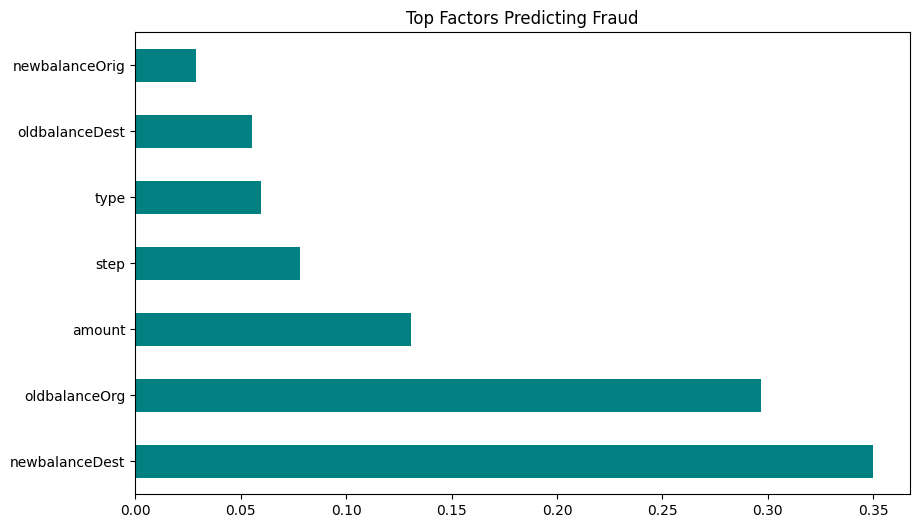

In [25]:
# --- 6. KEY FACTORS (Q5) ---
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
importances.nlargest(7).plot(kind='barh', color='teal')
plt.title('Top Factors Predicting Fraud')
plt.show()

In [ ]:
## Do These Factors Make Sense?

Yes, these factors make strong business and practical sense. Fraudulent transactions often involve unusually high transaction amounts, abnormal balance changes before and after transactions, and specific transaction types such as transfers and cash-outs.

Such patterns significantly deviate from normal customer behavior, making them reliable indicators of fraudulent activity. Therefore, the selected features align well with real-world fraud scenarios.


In [ ]:
## Fraud Prevention Strategies

To prevent fraudulent transactions while updating infrastructure, the company should adopt the following strategies:

1. Real-time Monitoring: Implement a system that flags transactions where the balance drops to exactly zero instantly.
2. Multi-Factor Authentication (MFA): Require extra verification for transfers exceeding a specific threshold (e.g., top 5% of average transaction size).
3. Blacklisted Merchants/Accounts: Maintain a dynamic database of accounts previously involved in fraudulent activities.

**Q8: Determining Effectiveness**

These measures help reduce fraud risk while maintaining a smooth customer experience.


In [ ]:
## Measuring Effectiveness of Prevention Strategies

The effectiveness of implemented fraud prevention strategies can be evaluated using the following metrics:

- Reduction in total fraud loss value over time.
- Improvement in fraud detection recall with controlled false positives.
- Stability of ROC-AUC score across different time periods.
- Continuous monitoring of model performance and data drift.
- Periodic review through dashboards and automated alerts.

These measures ensure that the fraud detection system remains effective, reliable, and scalable.
